In [1]:
# pandas for data loading, manipulation etc.
import pandas as pd


# numeric functions
import xgboost
import numpy as np
import collections
import math
import operator
from scipy import stats
from math import ceil
import time
import random as rnd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# modelling
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,Lars,LassoLars,SGDRegressor
from sklearn.linear_model import RidgeCV, LassoCV,BayesianRidge, LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score,train_test_split
from sklearn.metrics import make_scorer,r2_score,mean_squared_error,roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsRegressor #,KNearestNeighborsRegressor


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, minmax_scale
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE,SelectFromModel
from statsmodels.formula.api import poisson, negativebinomial

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
#warnings.filterwarnings("ignore")

In [2]:
datos = pd.read_csv('datacountstudents.csv')
datos = datos.iloc[:,1:]
# prepare for modeling
X = datos.drop(['yC'], axis=1)
Y = datos['yC'].values

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 33 columns):
yC     150 non-null int64
x1     150 non-null float64
x2     150 non-null float64
x3     150 non-null int64
x4     150 non-null int64
x5     150 non-null int64
x6     150 non-null int64
x7     150 non-null int64
x8     150 non-null float64
x9     150 non-null int64
x10    150 non-null float64
x11    150 non-null float64
x12    150 non-null float64
x13    150 non-null int64
x14    150 non-null int64
x15    150 non-null int64
x16    150 non-null int64
x17    150 non-null int64
x18    150 non-null int64
x19    150 non-null int64
x20    150 non-null int64
x21    150 non-null float64
x22    150 non-null float64
x23    150 non-null float64
x24    150 non-null float64
x25    150 non-null int64
x26    150 non-null int64
x27    150 non-null float64
x28    150 non-null int64
x29    150 non-null int64
x30    150 non-null int64
x31    150 non-null float64
x32    150 non-null float64
dtypes: flo

In [4]:
#Cambiar las discretas con valores diferentes a o 0 a continuas
datos = pd.read_csv('datacountstudents.csv', dtype={'x9':float,'x25':float,'x26':float,'x30':float})
datos = datos.iloc[:,1:]

In [5]:
X = datos.drop(['yC'], axis=1)
y = datos['yC'].values
# prepare for modeling

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [6]:
#nombres columnas continuas
train_C = X_train.select_dtypes(exclude=['int64'])
#train_D= X_train.select_dtypes(exclude=['float'
Columns_C = X_train.columns[(X_train.dtypes.values == np.dtype('float64'))]
#Columns_D = X_train.columns[(X_train.dtypes.values != np.dtype('float64'))]
# Estandarizar solo continuas en train
X_train_sc = X_train.copy()
col_names = Columns_C[0:13]
features_tr = X_train_sc[col_names]
scaler = StandardScaler().fit(features_tr.values)
features_tr = scaler.transform(features_tr.values)
X_train_sc[col_names] = features_tr
# Estandarizar solo continuas en test
X_test_sc = X_test.copy()
features_ts = X_test_sc[col_names]
features_ts = scaler.transform(features_ts.values)
X_test_sc[col_names] = features_ts
#dataframes
X_train_sc = pd.concat([X_train_sc], axis=1, sort=False)
X_test_sc = pd.concat([X_test_sc], axis=1, sort=False)
#X_train_sc.head()

In [7]:
train_x=X_train_sc
train_y=y_train   
Xts = X_test_sc
Yt = y_test

In [8]:
#for tuning parameters
parameters_for_testing = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[2,3,5],
    'n_estimators':[10000],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95]  
}

#https://www.datacamp.com/community/tutorials/xgboost-in-python borrar

In [32]:
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=10, max_depth=5,
     min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(train_x,train_y)
print (gsearch1.scorer_ ) # print (gsearch1.grid_scores_)
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   21.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   36.6s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   44.4s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   50.9s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Do

[03:09:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
make_scorer(mean_squared_error, greater_is_better=False)
best params
{'colsample_bytree': 0.4, 'gamma': 0.03, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 1e-05, 'reg_lambda': 0.45, 'subsample': 0.95}
best score
-1.5310436311720903


In [9]:
data_dmatrix = xgb.DMatrix(data=X_train_sc,label=y_train)
#params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5,'alpha': 10}#, 'n_estimators' : 10
params ={'colsample_bytree': 0.4, 'gamma': 0.03, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 1e-05, 'reg_lambda': 0.45, 'subsample': 0.95}

In [10]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

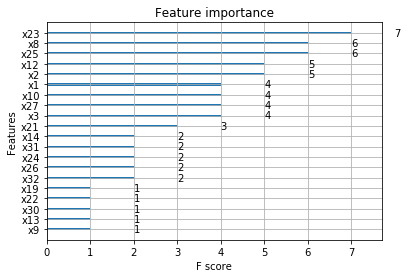

In [11]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [12]:
xg_reg = xgb.XGBRegressor(objective ='count:poisson')
xg_reg.fit(X_train_sc[['x23','x8','x25','x12','x2','x1','x10','x27','x3','x4','x5','x6','x7','x21']],y_train) #,'','x' , 'x31', 'x27', 'x23', 'x3','x25', 'x32', 'x22', 'x9', 'x12', 'x11', 'x14', 'x24', 'x21'
preds = xg_reg.predict(X_test_sc[['x23','x8','x25','x12','x2','x1','x10','x27','x3','x4','x5','x6','x7','x21']])#7 l.r.0.1
np.sqrt(mean_squared_error(y_test, np.round(preds)))

1.5347819244295118

In [13]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,preds))

-0.2235152883829843


In [14]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [15]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.491389,0.095403,1.512540,0.222283
1,1.409930,0.092408,1.465930,0.219772
2,1.331051,0.082116,1.420659,0.205199
3,1.264511,0.079432,1.376130,0.184084
4,1.197062,0.078677,1.343545,0.186912


In [16]:
print((cv_results["test-rmse-mean"]).tail(1))

31    1.157003
Name: test-rmse-mean, dtype: float64


In [17]:
y_ts = pd.DataFrame(y_test,columns=['y_ts'])
pred= pd.DataFrame(np.round(preds),columns=['predict'])
#pred
columns=['y_ts','pred']# X_train_sc,label=y_train
Result = pd.concat([y_ts,pred], axis=1, sort=False)

In [18]:
Result = pd.concat([y_ts,pred], axis=1, sort=False)
Result

,y_ts,predict
0,0,1.0
1,2,1.0
2,1,0.0
3,5,0.0
4,2,1.0
5,0,0.0
6,3,1.0
7,0,1.0
8,4,1.0
9,0,0.0


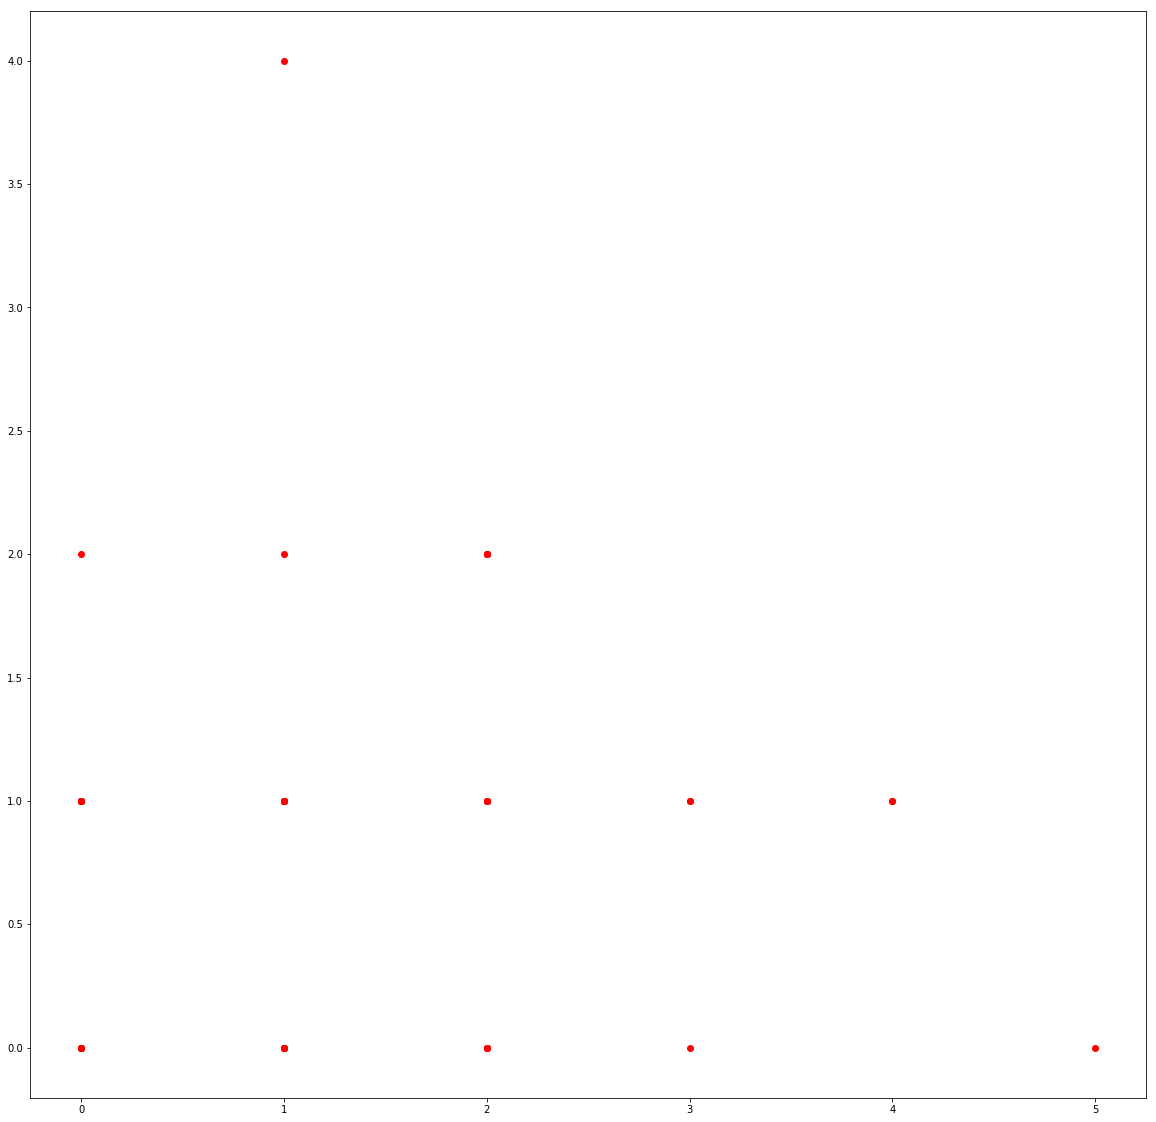

In [19]:
plt.scatter(y_test, np.round(preds), color = 'red')

In [20]:
name=X_train_sc.columns
name

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32'],
      dtype='object')

In [21]:
X_train_sc2=X_train_sc.reset_index().values
#X_train_sc2 = X_train_sc.as_matrix(columns=None)
#X_train_sc2 = X_train_sc.values
#y_train2 = pd.concat([y_train], axis=1, sort=False)
y_train2= pd.DataFrame(y_train,columns=['y_train'])
X_train_sc2= pd.DataFrame(X_train_sc2,columns=['id','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 
                                               'x12','x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',  
                                               'x22','x23', 'x24', 'x25', 'x26', 'x27','x28', 'x29', 'x30', 'x31','x32'])#
X_train_sc2=X_train_sc2.drop(['id'], axis=1)
X_train_sc2 = pd.concat([y_train2,X_train_sc2], axis=1, sort=False)
#X_train_sc2


In [22]:
X_test_sc2=X_test_sc.reset_index().values
y_test2= pd.DataFrame(y_test,columns=['y_test'])
X_test_sc2= pd.DataFrame(X_test_sc2,columns=['id','x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 
                                               'x12','x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',  
                                               'x22','x23', 'x24', 'x25', 'x26', 'x27','x28', 'x29', 'x30', 'x31','x32'])#
X_test_sc2=X_test_sc2.drop(['id'], axis=1)
X_test_sc2 = pd.concat([y_test2,X_test_sc2], axis=1, sort=False)

In [23]:
#m1 = poisson('y_train2~x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32', data = X_train_sc2).fit()
m1 = poisson('y_train2~x1+x2+x3+x4+x5+x6+x7+x8+x10+x12+x23+x24+x25+x27', data = X_train_sc2).fit()
print (m1.summary())

Optimization terminated successfully.
         Current function value: 1.275210
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:               y_train2   No. Observations:                  105
Model:                        Poisson   Df Residuals:                       90
Method:                           MLE   Df Model:                           14
Date:                Sun, 29 Sep 2019   Pseudo R-squ.:                  0.1909
Time:                        21:32:18   Log-Likelihood:                -133.90
converged:                       True   LL-Null:                       -165.49
                                        LLR p-value:                 3.217e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3296      0.346      0.951      0.341      -0.349       1.009
x1            -0.1825      0.

In [24]:
y_test

array([0, 2, 1, 5, 2, 0, 3, 0, 4, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 4, 1, 0, 0, 1, 0, 3, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 3, 1,
       2], dtype=int64)

In [25]:
#model_fit1 = X_test_sc
preds_2 = m1.predict(X_test_sc)
preds_2=preds_2.reset_index().values
#preds_2=preds_2.iloc[:,1:]
#y_test= preds_1
#preds_1.head(5)
y_test2 = pd.DataFrame(y_test,columns=['y_ts'])
pred2= pd.DataFrame(preds_2,columns=['id','pred1'])
Result2 = pd.concat([y_test2,np.round(pred2.iloc[:,1])], axis=1, sort=False)
Result2

,y_ts,pred1
0,0,2.0
1,2,0.0
2,1,1.0
3,5,0.0
4,2,1.0
5,0,1.0
6,3,3.0
7,0,2.0
8,4,3.0
9,0,0.0


In [26]:
m_nb = negativebinomial('y_train2~x1+x2+x3+x4+x5+x6+x7+x8+x10+x12+x23+x24+x25+x27', data = X_train_sc2).fit()
print (m_nb.summary())

         Current function value: 1.275213
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
                     NegativeBinomial Regression Results                      
Dep. Variable:               y_train2   No. Observations:                  105
Model:               NegativeBinomial   Df Residuals:                       90
Method:                           MLE   Df Model:                           14
Date:                Sun, 29 Sep 2019   Pseudo R-squ.:                  0.1709
Time:                        21:32:29   Log-Likelihood:                -133.90
converged:                      False   LL-Null:                       -161.49
                                        LLR p-value:                 8.044e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3275      0.348      0.941      0.347      -0.354       1.0

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2468: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2468: RuntimeWarning: invalid value encountered in multiply
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
preds_3 = m_nb.predict(X_test_sc)
preds_3=preds_3.reset_index().values
pred3= pd.DataFrame(preds_3,columns=['id','pred1'])
y_test3 = pd.DataFrame(y_test,columns=['y_ts'])
Result3 = pd.concat([y_test3,np.round(pred3.iloc[:,1])], axis=1, sort=False)
Result3

,y_ts,pred1
0,0,2.0
1,2,0.0
2,1,1.0
3,5,0.0
4,2,1.0
5,0,1.0
6,3,3.0
7,0,2.0
8,4,3.0
9,0,0.0


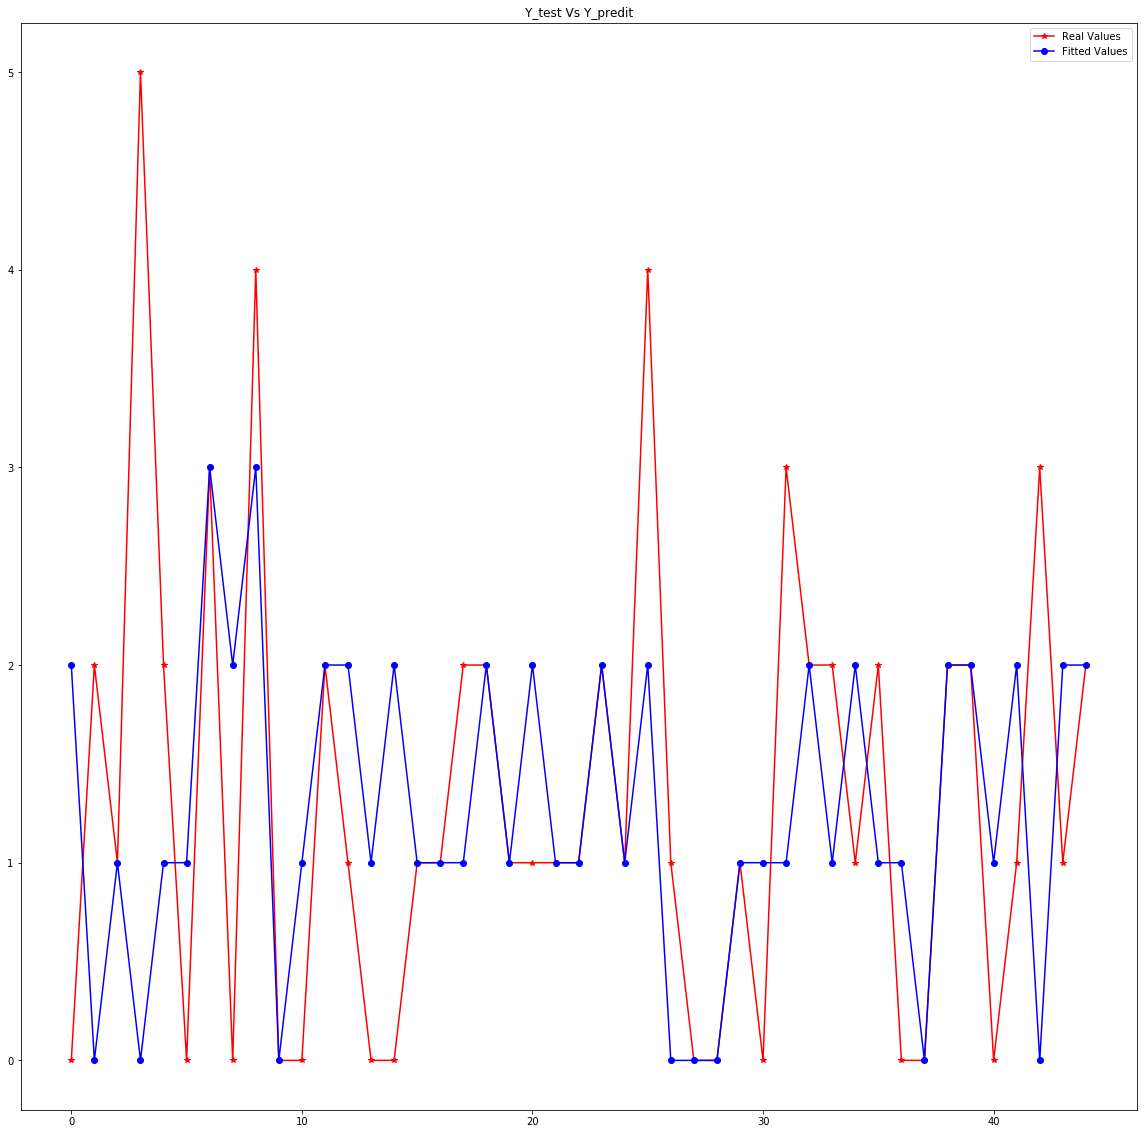

In [28]:
preds = np.round(pred2.iloc[:,1])
plt.plot(range(len(y_test3)), y_test3, 'r*-', range(len(y_test3)), preds, 'bo-')
plt.title('Y_test Vs Y_predit')
plt.legend(['Real Values', 'Fitted Values'])
plt.show()

https://jbhender.github.io/Stats506/F17/Projects/Poisson_Regression.html borrar

In [29]:
m_nb2 = negativebinomial('y_train2~x1+x3+x4+x5+x6+x7+x8+x10+x12+x23+x24+x25+x27', data = X_train_sc2).fit()
print (m_nb2.summary())

         Current function value: 1.276573
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44
                     NegativeBinomial Regression Results                      
Dep. Variable:               y_train2   No. Observations:                  105
Model:               NegativeBinomial   Df Residuals:                       91
Method:                           MLE   Df Model:                           13
Date:                Sun, 29 Sep 2019   Pseudo R-squ.:                  0.1700
Time:                        21:42:09   Log-Likelihood:                -134.04
converged:                      False   LL-Null:                       -161.49
                                        LLR p-value:                 4.207e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3225      0.347      0.930      0.352      -0.357       1.0

C:\Users\lmosquera\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [31]:
preds_4 = m_nb2.predict(X_test_sc)
preds_4=preds_4.reset_index().values
pred4= pd.DataFrame(preds_4,columns=['id','pred1'])
y_test4 = pd.DataFrame(y_test,columns=['y_ts'])
Result4 = pd.concat([y_test4,np.round(pred4.iloc[:,1])], axis=1, sort=False)
Result4

,y_ts,pred1
0,0,2.0
1,2,0.0
2,1,1.0
3,5,0.0
4,2,1.0
5,0,1.0
6,3,3.0
7,0,2.0
8,4,3.0
9,0,0.0


In [35]:
np.sqrt(mean_squared_error(y_test4,np.round(pred4.iloc[:,1])))

1.2909944487358056

In [36]:
np.sqrt(mean_squared_error(y_test3,np.round(pred3.iloc[:,1])))

1.2909944487358056